<a href="https://colab.research.google.com/github/Pragadesh-45/Nivu-5-Day-Bootcamp-Notebooks/blob/main/JCT_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.058823529411764705


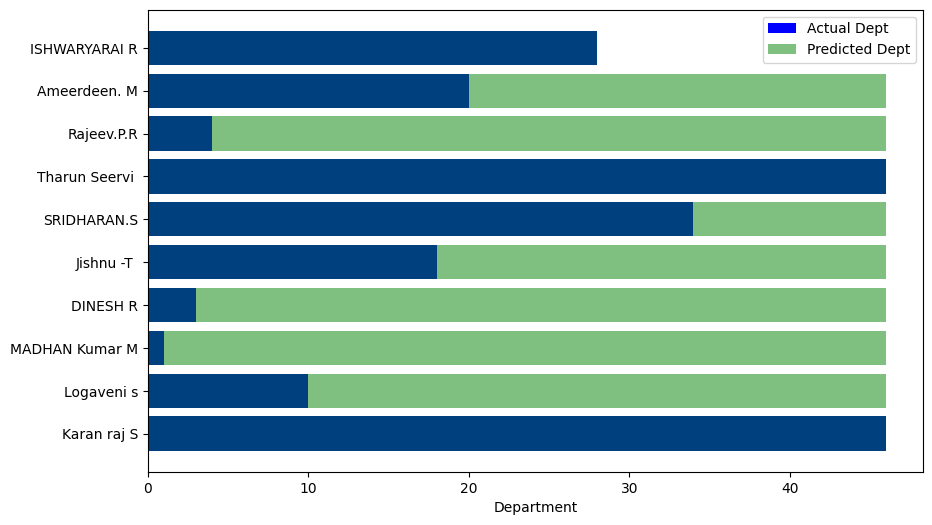

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load and Explore Data
df = pd.read_csv("JCT_students.csv")

# Step 2: Preprocess Data
label_encoder = LabelEncoder()
df['Dept'] = label_encoder.fit_transform(df['Dept'])

# Step 3: Split Data
X = df['Name (Optional)']
y = df['Dept']

# Step 4: Build a Text Classification Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 5: Plot the Predicted Departments
sample_size = 10
sample_data = df.sample(sample_size)

sample_X = sample_data['Name (Optional)']
sample_X_tfidf = tfidf_vectorizer.transform(sample_X)
sample_pred = classifier.predict(sample_X_tfidf)

sample_pred_dept = label_encoder.inverse_transform(sample_pred)

plt.figure(figsize=(10, 6))
plt.barh(sample_data['Name (Optional)'], sample_data['Dept'], label='Actual Dept', color='blue')
plt.barh(sample_data['Name (Optional)'], sample_pred, label='Predicted Dept', color='green', alpha=0.5)
plt.yticks(sample_data['Name (Optional)'])
plt.xlabel('Department')
plt.legend()
plt.show()
